In [1]:
import pandas as pd
from pandas import DataFrame
import seaborn
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read both csv files
city_file_name = os.path.join("pyber_data", "city_data.csv")
ride_file_name = os.path.join("pyber_data", "ride_data.csv")
city_data = pd.read_csv(city_file_name)
ride_data = pd.read_csv(ride_file_name)
city_data_df = pd.DataFrame(city_data)
ride_data_df = pd.DataFrame(ride_data)

In [3]:
#merge data frames
combined_data_df = pd.merge(city_data, ride_data,on="city")
combined_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [4]:
#average fare amount per city
avg_fare_per_city_df = round(pd.DataFrame(ride_data_df.groupby('city')['fare'].mean()),2)
avg_fare_per_city_df = avg_fare_per_city_df.rename(columns={'fare': 'Average Fare by City'})
avg_fare_per_city_df = avg_fare_per_city_df.reset_index()
avg_fare_per_city_df.head()

,city,Average Fare by City
0,Alvarezhaven,23.93
1,Alyssaberg,20.61
2,Anitamouth,37.32
3,Antoniomouth,23.62
4,Aprilchester,21.98


In [5]:
#total number of rides per city
tot_rides_per_city_df = pd.DataFrame(ride_data_df.groupby('city')['ride_id'].count())
tot_rides_per_city_df = tot_rides_per_city_df.rename(columns={'ride_id': 'Total Rides per City'})
tot_rides_per_city_df = tot_rides_per_city_df.reset_index()
tot_rides_per_city_df.head()

,city,Total Rides per City
0,Alvarezhaven,31
1,Alyssaberg,26
2,Anitamouth,9
3,Antoniomouth,22
4,Aprilchester,19


In [6]:
#total number of drivers per city
tot_drivers_per_city_df = pd.DataFrame(city_data_df.groupby('city')['driver_count'].sum())
tot_drivers_per_city_df = tot_drivers_per_city_df.rename(columns={'driver_count': 'Total Drivers per City'})
tot_drivers_per_city_df = tot_drivers_per_city_df.reset_index()
tot_drivers_per_city_df.head()

,city,Total Drivers per City
0,Alvarezhaven,21
1,Alyssaberg,67
2,Anitamouth,16
3,Antoniomouth,21
4,Aprilchester,49


In [7]:
city_group_df = city_data_df.groupby('city')
city_type_df = pd.DataFrame(city_group_df['type'].value_counts())
city_type_df = city_type_df.rename(columns={'type': 'city_count'})
city_type_df = city_type_df.reset_index()
city_type_df.head()

,city,type,city_count
0,Alvarezhaven,Urban,1
1,Alyssaberg,Urban,1
2,Anitamouth,Suburban,1
3,Antoniomouth,Urban,1
4,Aprilchester,Urban,1


In [8]:
fin_city_df = avg_fare_per_city_df.merge(tot_rides_per_city_df, on='city').merge(tot_drivers_per_city_df, on='city')\
                                    .merge(city_type_df, on='city')
fin_city_df = fin_city_df[['city','Average Fare by City','Total Rides per City','Total Drivers per City','type']]
fin_city_df.head()

,city,Average Fare by City,Total Rides per City,Total Drivers per City,type
0,Alvarezhaven,23.93,31,21,Urban
1,Alyssaberg,20.61,26,67,Urban
2,Anitamouth,37.32,9,16,Suburban
3,Antoniomouth,23.62,22,21,Urban
4,Aprilchester,21.98,19,49,Urban


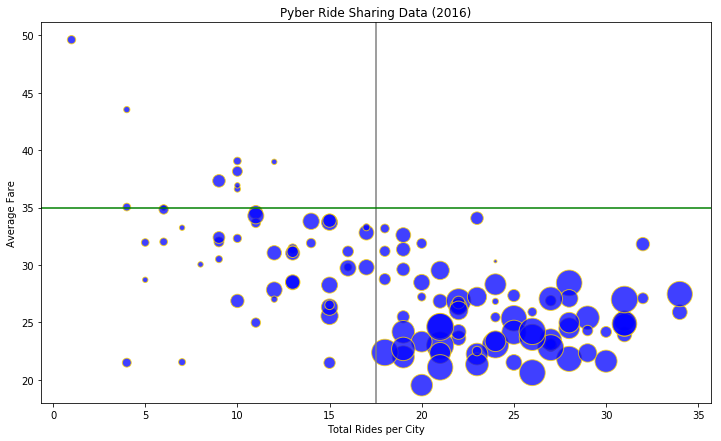

In [9]:
x_axis = fin_city_df['Total Rides per City']
y_axis = fin_city_df['Average Fare by City']
s_value = fin_city_df['Total Drivers per City']*10
plt.figure(figsize=(12,7))
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Rides per City')
plt.ylabel('Average Fare')
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="gold",s=s_value, alpha=.75)
plt.axvline(17.5, color='grey')
plt.axhline(35, color='green')

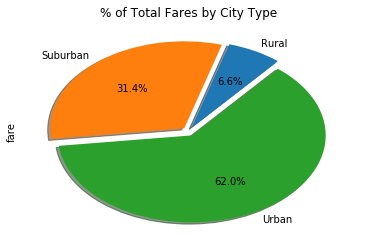

In [10]:
# Create a pie chart to show % of total fares by city type
total_fares_df = combined_data_df.groupby('type')['fare'].sum()
fares_by_type = total_fares_df.plot(kind="pie", title=('% of Total Fares by City Type'),\
                             autopct='%.1f%%', explode=(.05,.05,.05),shadow=True, startangle=50)
plt.show()

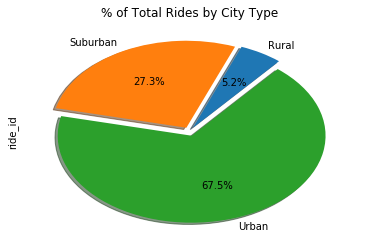

In [11]:
# Create a pie chart to show % of total rides by city type
total_rides_df = combined_data_df.groupby('type')['ride_id'].count()
rides_by_type = total_rides_df.plot(kind="pie", title=('% of Total Rides by City Type'),\
                             autopct='%.1f%%', explode=(.05,.05,.05),shadow=True, startangle=50)
plt.show()

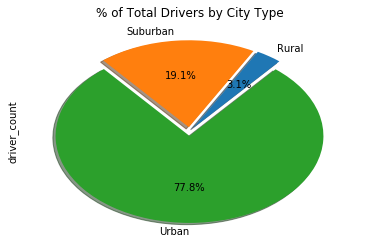

In [12]:
# Create a pie chart to show % of total count of drivers by city type
driver_count_df = city_data_df.groupby('type')['driver_count'].sum()
drivers_by_type = driver_count_df.plot(kind="pie", title=('% of Total Drivers by City Type'),\
                             autopct='%.1f%%', explode=(.05,.05,.05),shadow=True, startangle=50)
plt.show()